In [10]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM dependencies
from sqlalchemy import create_engine, inspect, text, func

In [12]:
# Create the connection engine
engine = create_engine("sqlite:///../Database/us_tornado.sqlite")

In [14]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

us_tornado
--------
year BIGINT
month BIGINT
day BIGINT
date DATETIME
state TEXT
tornado_magnitude BIGINT
injuries BIGINT
fatalities BIGINT
start_latitude FLOAT
start_longitude FLOAT
end_latitude FLOAT
end_longitude FLOAT
tornado_length FLOAT
tornado_width BIGINT



In [16]:
conn = engine.connect() # Raw SQL/Pandas

In [60]:
query = text(""" 
                SELECT 
                    year,
                    sum(fatalities) AS 'Total_Fatalities'
                FROM 
                    us_tornado
                GROUP BY
                    year
                """)
df = pd.read_sql(query, con=conn)
df

,year,Total_Fatalities
0,1950,70
1,1951,34
2,1952,230
3,1953,523
4,1954,36
...,...,...
67,2017,35
68,2018,10
69,2019,42
70,2020,76


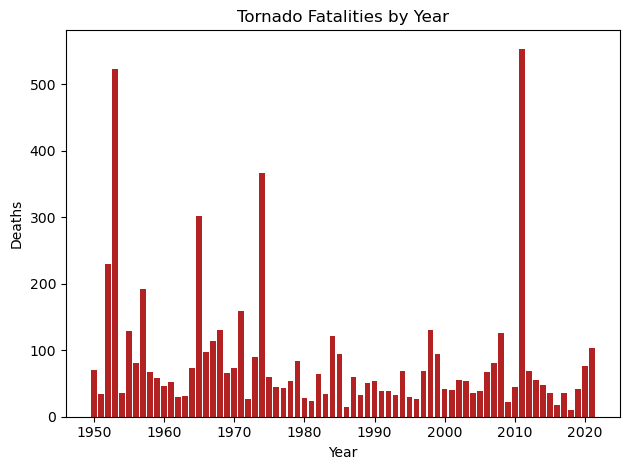

In [21]:
# Create a bar chart
plt.bar(df['year'], df['Total_Fatalities'], color='firebrick')

# Add labels
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Tornado Fatalities by Year')

# Show the plot
plt.tight_layout()
# Show the plot
plt.show()


In [23]:
# query = text(""" 
#                 SELECT 
#                     *
#                 FROM 
#                     us_tornado
#                 """)
# data_df = pd.read_sql(query, con=conn)
# data_df

In [25]:
query = text("""SELECT 
   year AS Year, 
    COUNT(*) AS Tornadoes, 
    SUM(fatalities) AS Fatalities
FROM 
    us_tornado
GROUP BY 
    year
ORDER BY 
    year ASC;""")

data_df = pd.read_sql(query, con=conn)
data_df

,Year,Tornadoes,Fatalities
0,1950,201,70
1,1951,258,34
2,1952,235,230
3,1953,421,523
4,1954,547,36
...,...,...,...
67,2017,1426,35
68,2018,1125,10
69,2019,1516,42
70,2020,1082,76


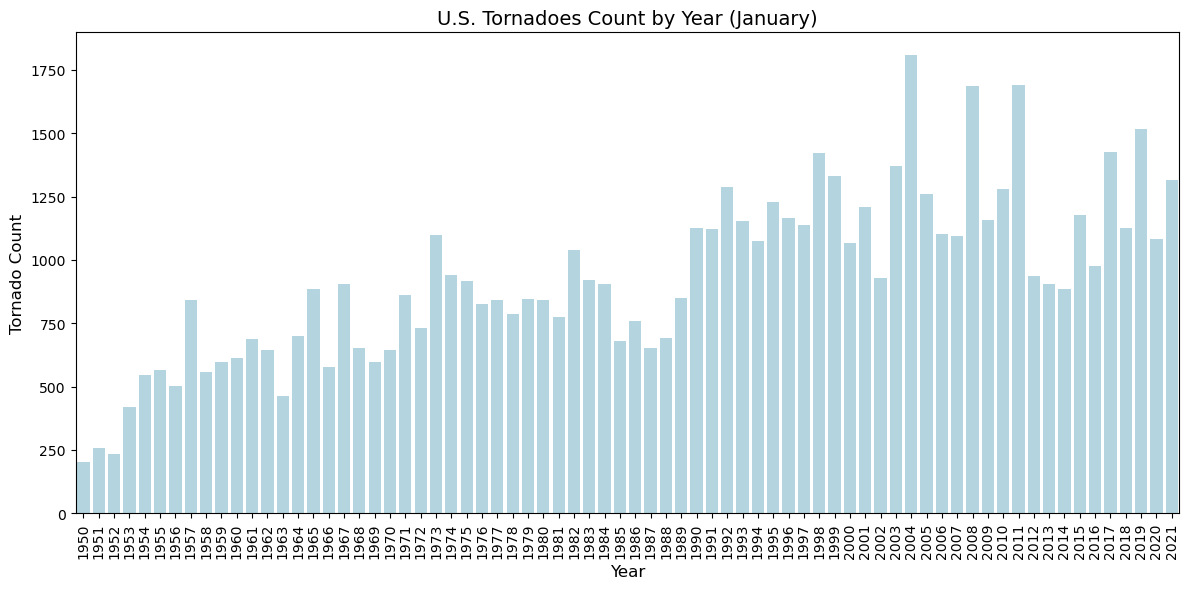

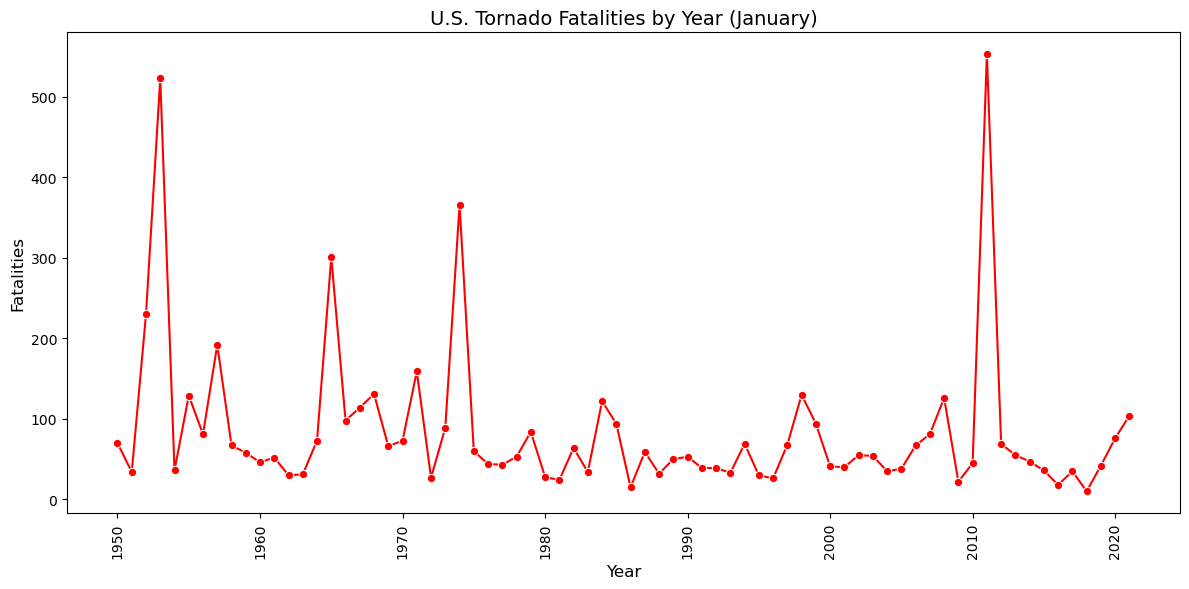

In [27]:
# Create the bar chart for tornado counts
plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="Tornadoes", data=data_df, color="lightblue")
plt.title("U.S. Tornadoes Count by Year (January)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Tornado Count", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create the line chart for fatalities
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Fatalities", data=data_df, marker="o", color="red")
plt.title("U.S. Tornado Fatalities by Year (January)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Fatalities", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





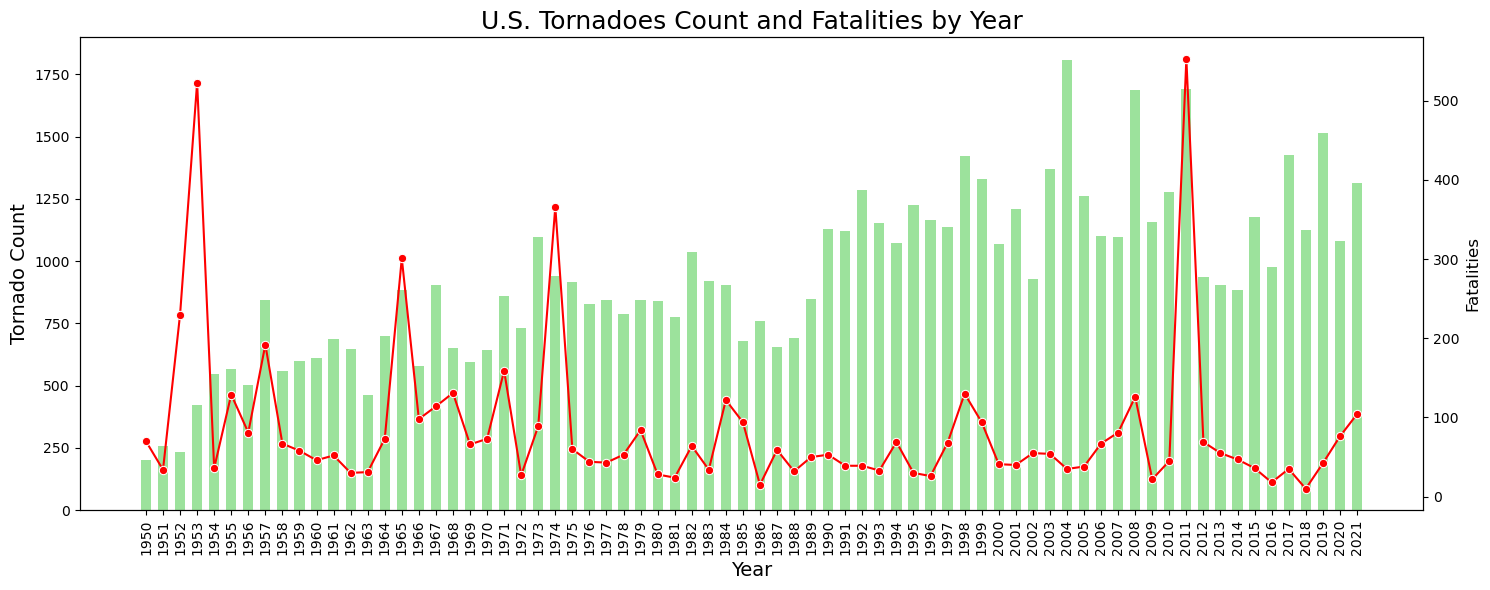

In [28]:
data_df["Year"] = data_df["Year"].astype(str)

# Create a figure with a single subplot layout
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the bar chart for tornado count
sns.barplot(x="Year", y="Tornadoes", data=data_df, color="lightgreen", ax=ax1, width=0.6, )
ax1.set_title("U.S. Tornadoes Count and Fatalities by Year", fontsize=18)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Tornado Count", fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis for fatalities
ax2 = ax1.twinx()
sns.lineplot(x="Year", y="Fatalities", data=data_df, marker="o", color="red", ax=ax2)
ax2.set_ylabel("Fatalities", fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the combined chart
plt.show()


In [29]:
query = text("""
                SELECT 
                    state, 
                    COUNT(*) AS tornado_count 
                FROM 
                    us_tornado 
                GROUP BY 
                    state 
                ORDER BY 
                    tornado_count desc
                LIMIT 20;
            """)
state_tornado_count_df = pd.read_sql(query, con=conn)
state_tornado_count_df 

,state,tornado_count
0,TX,9022
1,KS,4318
2,OK,4072
3,FL,3464
4,NE,2949
5,IA,2767
6,IL,2678
7,MS,2474
8,MO,2423
9,AL,2352


C:\Users\neela\AppData\Local\Temp\ipykernel_7796\403328446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_tornado_count_df, x='state', y='tornado_count', palette='viridis')


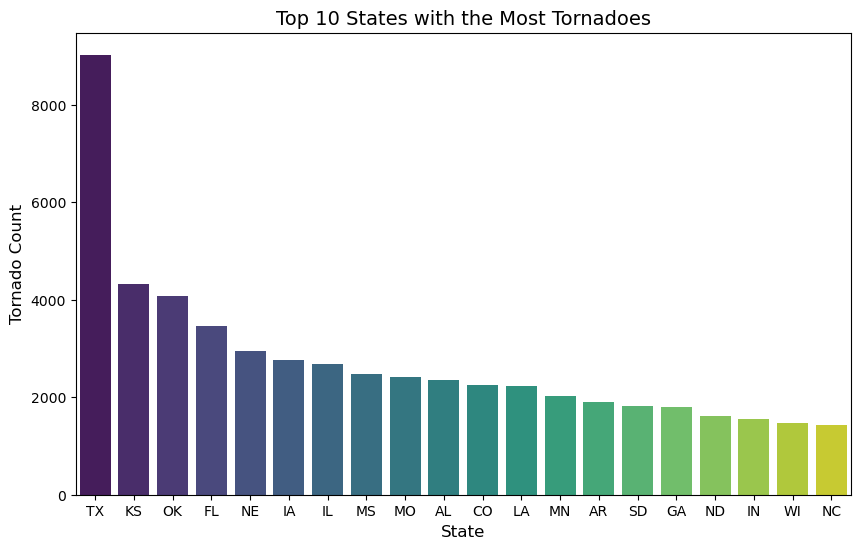

In [31]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(data=state_tornado_count_df, x='state', y='tornado_count', palette='viridis')

# Customizing the chart
plt.title('Top 10 States with the Most Tornadoes', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Tornado Count', fontsize=12)
  

# Show the plot
plt.show()

In [32]:
query = text("""
                SELECT 
                    year, 
                    COUNT(*) AS tornado_count 
                FROM 
                    us_tornado 
                GROUP BY 
                    year 
                ORDER BY 
                    tornado_count desc;
            """)
tornado_count_per_year_df = pd.read_sql(query, con=conn)
tornado_count_per_year_df.head(10)

,year,tornado_count
0,2004,1808
1,2011,1690
2,2008,1688
3,2019,1516
4,2017,1426
5,1998,1421
6,2003,1370
7,1999,1330
8,2021,1314
9,1992,1287


In [35]:
query = text("""SELECT 
                    month, 
                    COUNT(*) AS tornado_count
                FROM 
                    us_tornado
                GROUP BY 
                    month
                ORDER BY 
                    tornado_count DESC;""")
month_tornadoes_df = pd.read_sql(query, con=conn)
month_tornadoes_df

,month,tornado_count
0,5,14692
1,6,12345
2,4,9543
3,7,6904
4,8,4751
5,3,4505
6,9,3445
7,10,2790
8,11,2643
9,2,1942


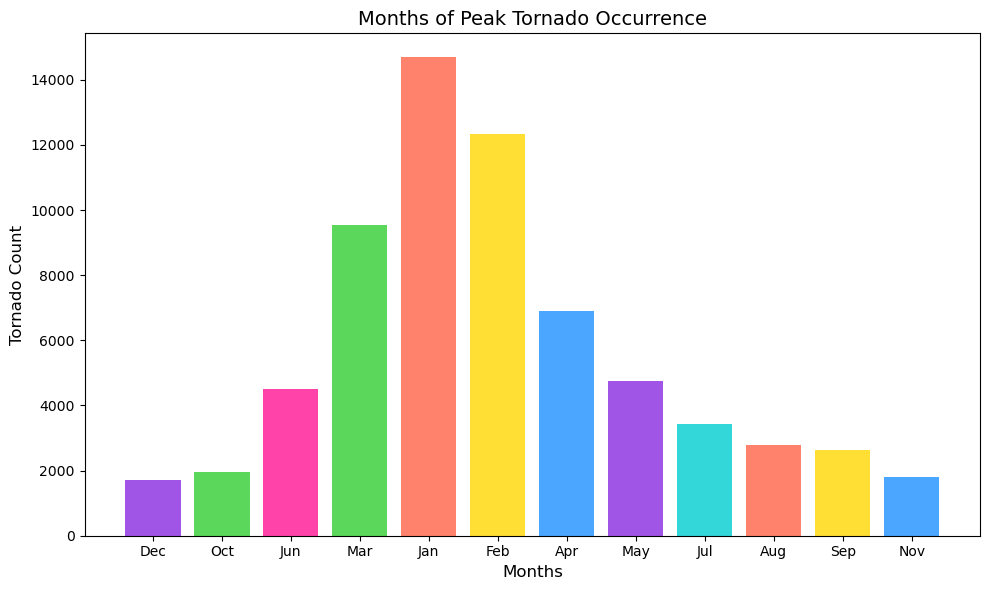

In [38]:
plt.figure(figsize=(10, 6))

# Set colors 
colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00CED1', 
          '#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2'] 

# List of month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Bar plot
plt.bar(month_tornadoes_df['month'], month_tornadoes_df['tornado_count'], color=colors, alpha=0.8)

# Customizing the chart
plt.title('Months of Peak Tornado Occurrence', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Tornado Count', fontsize=12)

# Set x-ticks to display month names
plt.xticks(month_tornadoes_df['month'], month_names)

# Show the plot
plt.tight_layout()
plt.show()




In [40]:
query = text("""
                SELECT 
                    year, 
                    tornado_magnitude,
                    start_latitude,
                    start_longitude,
                    state
                FROM 
                    us_tornado 
                GROUP BY 
                    year 
                ORDER BY 
                    year asc;
            """)
map_df = pd.read_sql(query, con=conn)
map_df.head(10)


,year,tornado_magnitude,start_latitude,start_longitude,state
0,1950,3,39.10,-89.30,IL
1,1951,3,31.30,-92.47,LA
2,1952,2,41.60,-80.30,PA
3,1953,2,33.83,-92.17,AR
4,1954,1,33.38,-88.42,MS
5,1955,0,35.07,-97.93,OK
6,1956,3,35.20,-92.45,AR
7,1957,1,21.52,-158.07,HI
8,1958,1,28.25,-82.73,FL
9,1959,0,32.02,-90.63,MS


In [43]:
query = text("""SELECT * 
                FROM 
                    us_tornado 
                ORDER BY 
                    fatalities DESC 
                LIMIT 1;
            """)
fatalities_df = pd.read_sql(query, con=conn)
fatalities_df

,year,month,day,date,state,tornado_magnitude,injuries,fatalities,start_latitude,start_longitude,end_latitude,end_longitude,tornado_length,tornado_width
0,2011,5,22,2011-05-22 00:00:00.000000,MO,5,1150,158,37.0524,-94.5932,36.9838,-94.2213,21.62,1600


In [45]:
# Bar chart or line chart showing the number of tornadoes per year.
query = text("""SELECT 
                    year, 
                    COUNT(*) AS total_tornadoes
                FROM 
                    us_tornado
                GROUP BY 
                    year
                ORDER BY 
                    year DESC
""")
tornado_per_year_df = pd.read_sql(query, con=conn)
tornado_per_year_df

,year,total_tornadoes
0,2021,1314
1,2020,1082
2,2019,1516
3,2018,1125
4,2017,1426
...,...,...
67,1954,547
68,1953,421
69,1952,235
70,1951,258


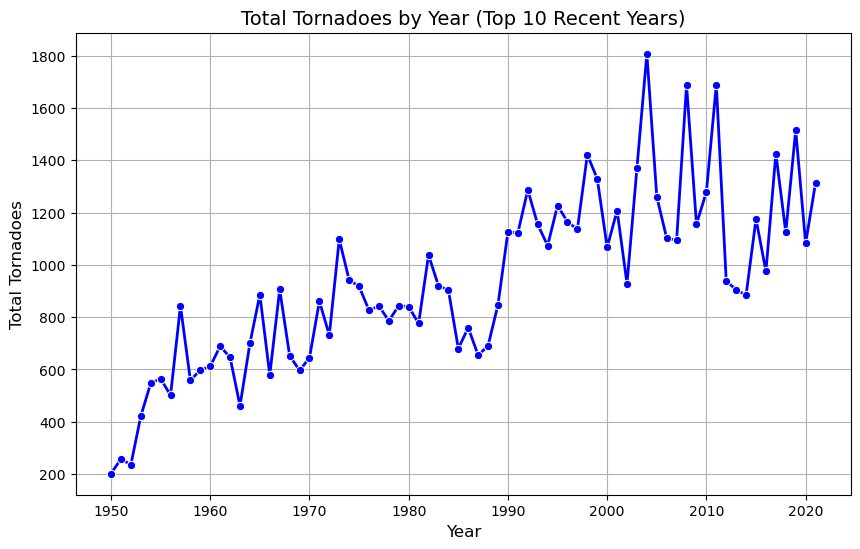

In [47]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Line plot
sns.lineplot(data=tornado_per_year_df, x='year', y='total_tornadoes', marker='o', color='b', linewidth=2)

# Customizing the chart
plt.title('Total Tornadoes by Year (Top 10 Recent Years)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Tornadoes', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

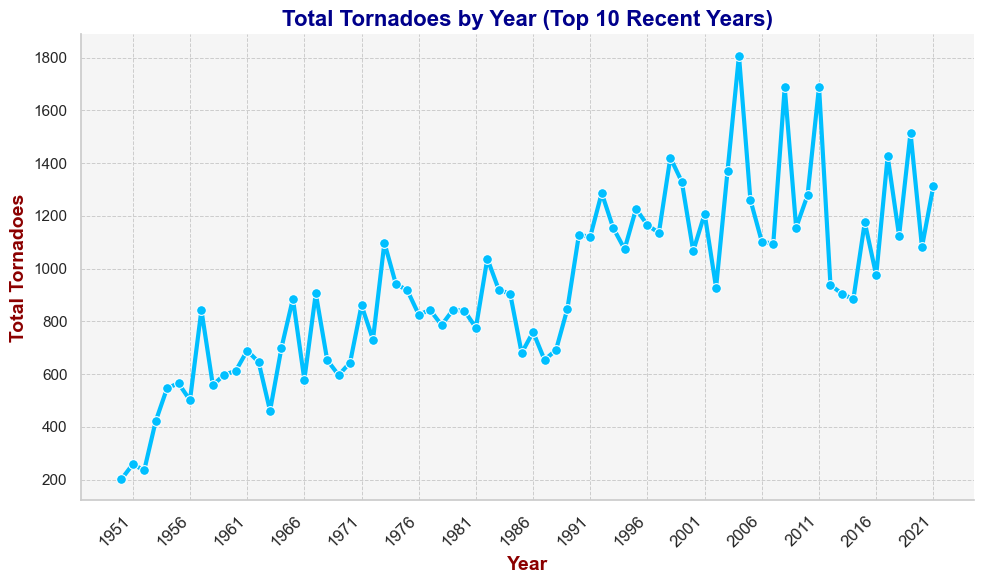

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the tornado_per_year_df DataFrame loaded with 'year' and 'total_tornadoes'

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Plotting the data
plt.figure(figsize=(10, 6))

# Line plot with additional customizations
sns.lineplot(data=tornado_per_year_df, x='year', y='total_tornadoes', marker='o', color='deepskyblue', linewidth=3, markersize=7)

# Customizing the chart
plt.title('Total Tornadoes by Year (Top 10 Recent Years)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Total Tornadoes', fontsize=14, fontweight='bold', color='darkred')

# Add a grid with light style for a clean look
plt.grid(True, linestyle='--', linewidth=0.7)

# Set x-ticks to show every 5th year
xticks = tornado_per_year_df['year'][::5]  # Select every 5th year
plt.xticks(xticks, rotation=45, ha='right', fontsize=12)

# Customize the plot’s background and borders
plt.gca().set_facecolor('whitesmoke')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


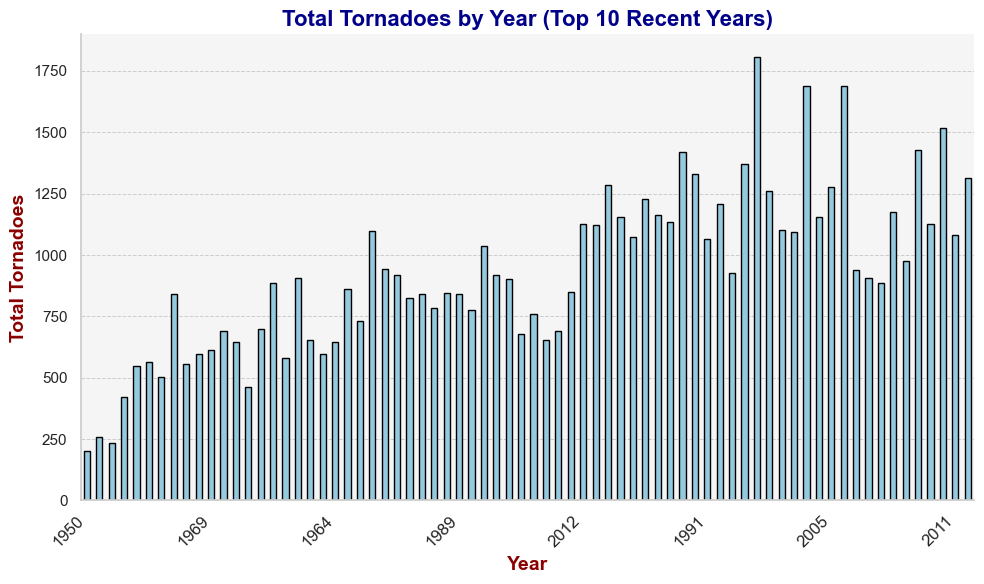

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the tornado_per_year_df DataFrame loaded with 'year' and 'total_tornadoes'

# Sort the DataFrame by 'total_tornadoes' in ascending order
tornado_per_year_df = tornado_per_year_df.sort_values(by='total_tornadoes', ascending=True)

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Plotting the bar chart with thinner bars (set width < 1 to make bars thinner)
plt.figure(figsize=(10, 6))

# Bar plot with additional customizations
sns.barplot(data=tornado_per_year_df, x='year', y='total_tornadoes', color='skyblue', edgecolor='black', width=0.5)

# Customizing the chart
plt.title('Total Tornadoes by Year (Top 10 Recent Years)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Total Tornadoes', fontsize=14, fontweight='bold', color='darkred')

# Add a grid for the y-axis
plt.grid(True, linestyle='--', linewidth=0.7, axis='y')

# Set x-ticks to show every 5th year
xticks = tornado_per_year_df['year'][::10]  # Select every 5th year
xtick_positions = range(len(tornado_per_year_df['year']))  # Get positions of all years

# Update x-ticks
plt.xticks(xtick_positions[::10], xticks, rotation=45, ha='right', fontsize=12)

# Customize the plot’s background and borders
plt.gca().set_facecolor('whitesmoke')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()



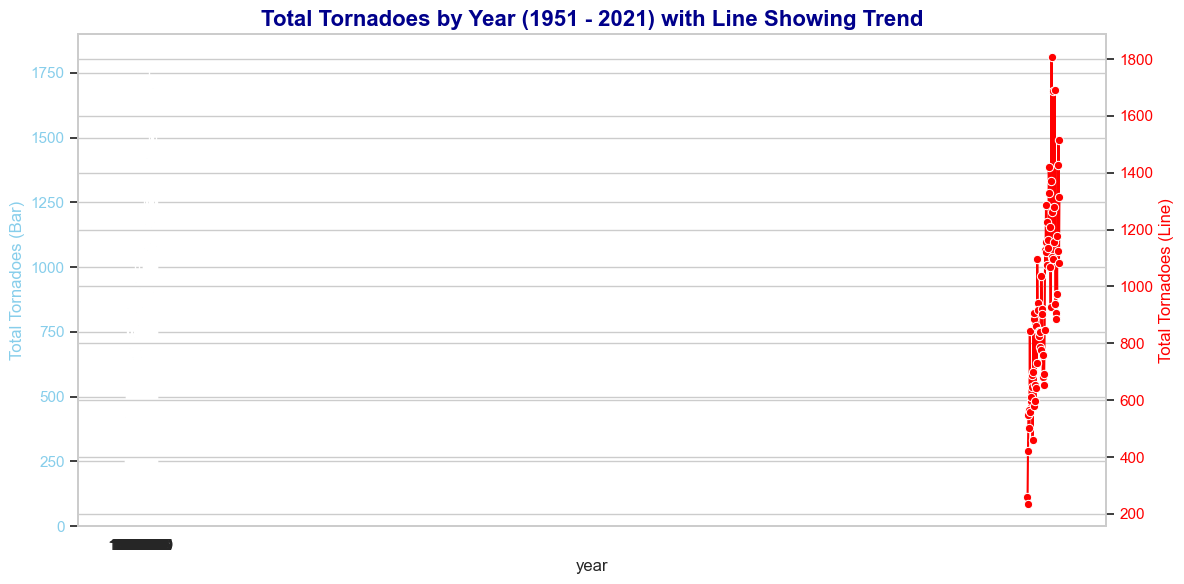

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have the tornado_per_year_df DataFrame loaded with 'year' and 'total_tornadoes'

# Filter data for years between 1951 and 2021
tornado_per_year_df = tornado_per_year_df[(tornado_per_year_df['year'] >= 1951) & (tornado_per_year_df['year'] <= 2021)]

# Sort the DataFrame by 'year' in ascending order
tornado_per_year_df = tornado_per_year_df.sort_values(by='year', ascending=True)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Total tornadoes per year)
sns.barplot(x='year', y='total_tornadoes', data=tornado_per_year_df, ax=ax1, color='skyblue')
ax1.set_ylabel('Total Tornadoes (Bar)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Line chart (Total tornadoes per year, same data for overlaying)
sns.lineplot(x='year', y='total_tornadoes', data=tornado_per_year_df, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Total Tornadoes (Line)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Total Tornadoes by Year (1951 - 2021) with Line Showing Trend', fontsize=16, fontweight='bold', color='darkblue')
fig.tight_layout()

# Display the plot
plt.show()




In [76]:
query = text("""SELECT 
                    tornado_magnitude, COUNT(tornado_magnitude) AS "Magnitude Count"
                FROM 
                    us_tornado
                GROUP BY 
                    tornado_magnitude

            """)
magnitude_count_df = pd.read_sql(query, con=conn)
magnitude_count_df

,tornado_magnitude,Magnitude Count
0,-9,605
1,0,31048
2,1,22783
3,2,9490
4,3,2530
5,4,581
6,5,59


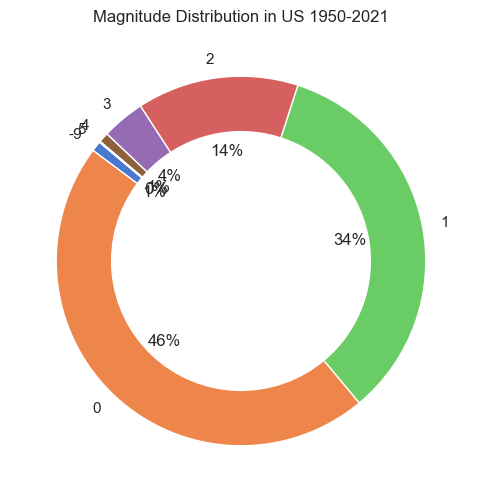

In [82]:
# Plotting the donut chart
plt.figure(figsize=(8, 6)) 

plt.pie(magnitude_count_df['Magnitude Count'], 
        labels=magnitude_count_df['tornado_magnitude'],  
        autopct='%1.0f%%', 
        startangle=140,  
        wedgeprops={'width': 0.3})  

# Title 
plt.title('Magnitude Distribution in US 1950-2021')

# Display the chart
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each magnitude
magnitude_counts = df['mag'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,8))
plt.pie(magnitude_counts.values, labels=magnitude_counts.index,
        autopct='%1.1f%%', shadow=True)
plt.title('Magnitude Distribution')
plt.show()


In [111]:
conn.close()
engine.dispose

<bound method Engine.dispose of Engine(sqlite:///../Database/us_tornado.sqlite)>